 # Importing Libaries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score,accuracy_score
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
%matplotlib inline

# Read dataset

In [2]:
df=pd.read_csv('data.csv')

In [3]:
df.head()

,OSM_ID,LONGITUDE,LATITUDE,ALTITUDE
0,144552912,9.349849,56.740876,17.052772
1,144552912,9.350188,56.740679,17.614840
2,144552912,9.350549,56.740544,18.083536
3,144552912,9.350806,56.740484,18.279465
4,144552912,9.351053,56.740486,18.422974


In [4]:
df.tail()

,OSM_ID,LONGITUDE,LATITUDE,ALTITUDE
434869,93323205,9.936479,57.499686,20.134033
434870,93323205,9.935696,57.499426,20.580884
434871,93323205,9.935009,57.499282,19.733141
434872,93323209,9.943479,57.495919,24.027015
434873,93323209,9.943451,57.496270,24.635285


<AxesSubplot:>

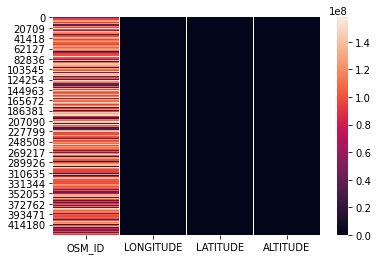

In [5]:
sns.heatmap(df)

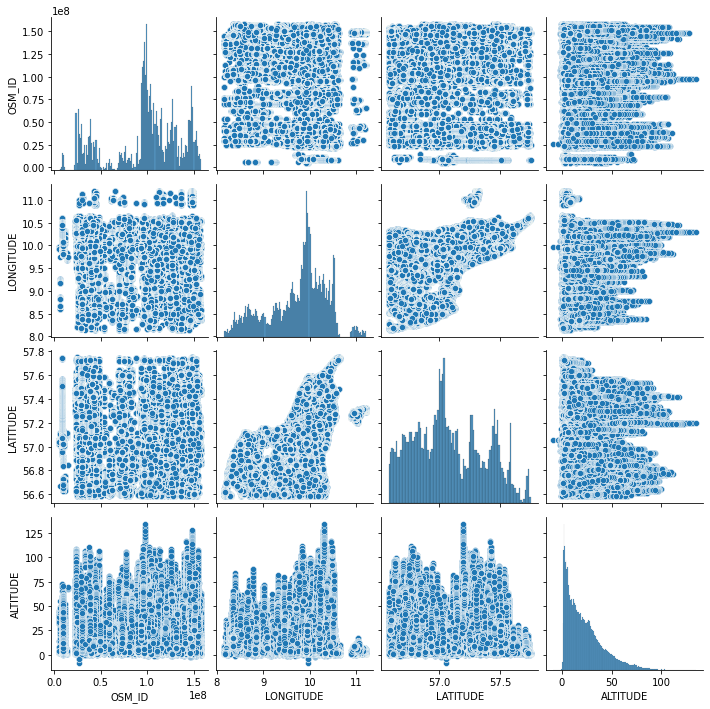

In [27]:
sns.pairplot(df)

array([[<AxesSubplot:title={'center':'OSM_ID'}>,
        <AxesSubplot:title={'center':'LONGITUDE'}>],
       [<AxesSubplot:title={'center':'LATITUDE'}>,
        <AxesSubplot:title={'center':'ALTITUDE'}>]], dtype=object)

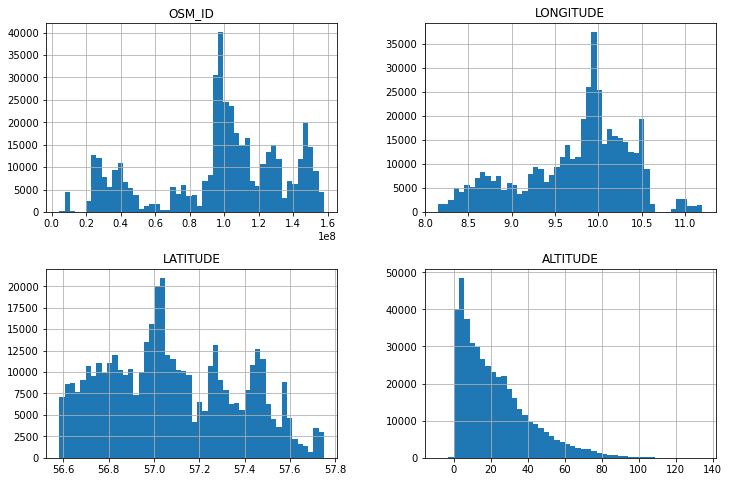

In [7]:
df.hist(bins=50,figsize=(12,8))

array([[<AxesSubplot:xlabel='OSM_ID', ylabel='OSM_ID'>,
        <AxesSubplot:xlabel='LONGITUDE', ylabel='OSM_ID'>,
        <AxesSubplot:xlabel='LATITUDE', ylabel='OSM_ID'>,
        <AxesSubplot:xlabel='ALTITUDE', ylabel='OSM_ID'>],
       [<AxesSubplot:xlabel='OSM_ID', ylabel='LONGITUDE'>,
        <AxesSubplot:xlabel='LONGITUDE', ylabel='LONGITUDE'>,
        <AxesSubplot:xlabel='LATITUDE', ylabel='LONGITUDE'>,
        <AxesSubplot:xlabel='ALTITUDE', ylabel='LONGITUDE'>],
       [<AxesSubplot:xlabel='OSM_ID', ylabel='LATITUDE'>,
        <AxesSubplot:xlabel='LONGITUDE', ylabel='LATITUDE'>,
        <AxesSubplot:xlabel='LATITUDE', ylabel='LATITUDE'>,
        <AxesSubplot:xlabel='ALTITUDE', ylabel='LATITUDE'>],
       [<AxesSubplot:xlabel='OSM_ID', ylabel='ALTITUDE'>,
        <AxesSubplot:xlabel='LONGITUDE', ylabel='ALTITUDE'>,
        <AxesSubplot:xlabel='LATITUDE', ylabel='ALTITUDE'>,
        <AxesSubplot:xlabel='ALTITUDE', ylabel='ALTITUDE'>]], dtype=object)

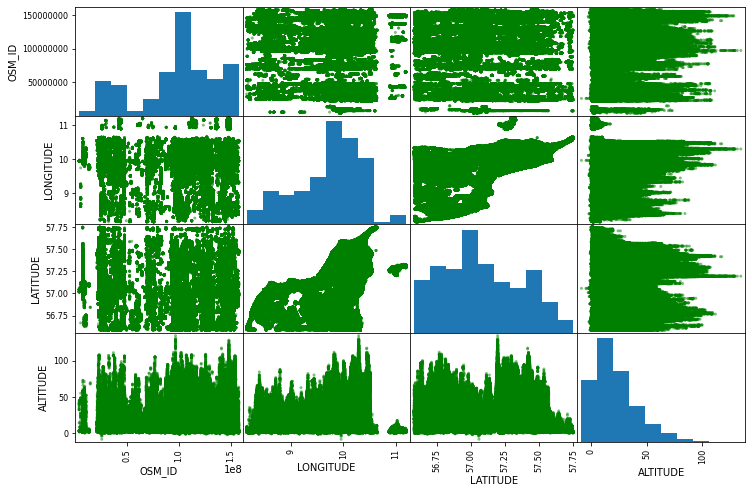

In [31]:
scatter_matrix(df,figsize=(12,8),color='g')

# Spilting dataset

In [8]:
# def split_train_test(data,test_ratio):
#     np.random.seed(42)
#     shuffled=np.random.permutation(len(data))
#     test_set_size=int(len(data)*test_ratio)
#     test_indices=shuffled[:test_set_size]
#     train_indices=shuffled[test_set_size:]
#     return data.iloc[train_indices],data.iloc[test_indices]

In [9]:
# train_set,test_set=split_train_test(df,0.2)

# Linear Reagression

In [10]:
train_set,test_set=train_test_split(df,test_size=0.2,random_state=42)

# DecisionTreeRegression

In [11]:
train_set_1,test_set_1=train_test_split(df,test_size=0.2,random_state=42)

In [12]:
print(f'Linear Regression\nRow in traning set is {len(train_set)}\nRowin testing set is {len(test_set)}')
print("")
print(f'Decision Tree Regression\nRow in traning set is {len(train_set_1)}\nRowin testing set is {len(test_set_1)}')
    

Linear Regression
Row in traning set is 347899
Rowin testing set is 86975

Decision Tree Regression
Row in traning set is 347899
Rowin testing set is 86975


In [13]:
x_train=np.array(train_set[['LONGITUDE','ALTITUDE','OSM_ID']])
y_train=np.array(train_set[['LATITUDE']])
x_test=np.array(test_set[['LONGITUDE','ALTITUDE','OSM_ID']])
y_test=np.array(test_set[['LATITUDE']])

In [14]:
print(f'x_train = {x_train.shape}\ny_train = {y_train.shape}\nx_test = {x_test.shape}\ny_test = {y_test.shape}')

x_train = (347899, 3)
y_train = (347899, 1)
x_test = (86975, 3)
y_test = (86975, 1)


In [15]:
x_trainTree=np.array(train_set_1[['LONGITUDE','ALTITUDE','OSM_ID']])
y_trainTree=np.array(train_set_1[['LATITUDE']])
x_testTree=np.array(test_set_1[['LONGITUDE','ALTITUDE','OSM_ID']])
y_testTree=np.array(test_set_1[['LATITUDE']])

In [16]:
print(f'x_trainTree = {x_trainTree.shape}\ny_trainTree = {y_trainTree.shape}\nx_testTree = {x_testTree.shape}\ny_testTree = {y_testTree.shape}')

x_trainTree = (347899, 3)
y_trainTree = (347899, 1)
x_testTree = (86975, 3)
y_testTree = (86975, 1)


# Linear Regression Model

In [17]:
model=LinearRegression()

In [18]:
model.fit(x_train,y_train)

LinearRegression()

In [19]:
model.coef_

array([[ 2.63590022e-01, -1.99442189e-03, -1.34678106e-10]])

In [20]:
model.intercept_

array([54.57592114])

In [21]:
y_pred=model.predict(x_test)

# Predict R2 score

In [22]:
r2_score(y_test,y_pred)

0.3392047962386662

# Decission Tree Regression Model

In [23]:
modelTree=DecisionTreeRegressor()

In [24]:
modelTree.fit(x_trainTree,y_trainTree)

DecisionTreeRegressor()

In [25]:
y_pred_2=modelTree.predict(x_testTree)

# Predict R2 score

In [26]:
r2_score(y_test,y_pred_2)

0.9869550897872873